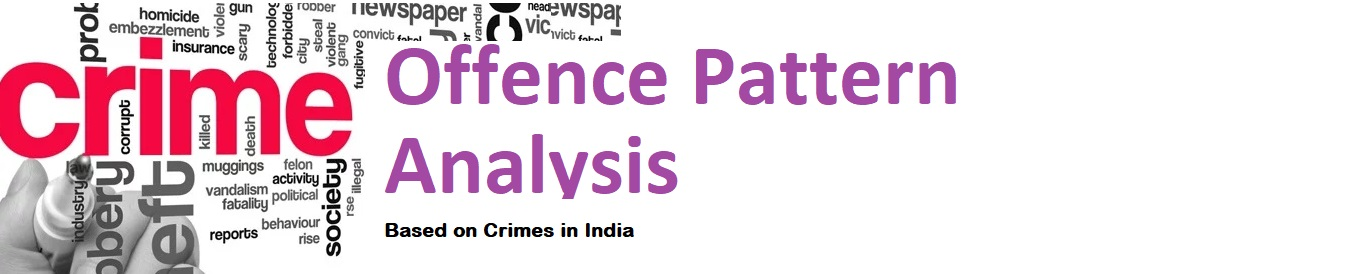

# Module: Data Analysis on Crime against Women
In this module, we are doing data analysis based on datasets of Crime against Women. <br>
Data has been gathered from http://ncrb.gov.in/  <br>
Crimes Against women include following crime heads:
1. Rape
2. Kidnapping & Abduction 
3. Dowry Deaths
4. Assault on women with intent to outrage her modesty
5. Insult to modesty of women 
6. Cruelty by husband or his relatives
7. Importation of girls from foreign country 
8. Immoral Traffic Act 
9. Dowry Prohibition Act 
10. Indecent Representation on of Women Act
11. Commission of sati prevention Act


In [1]:
#Notebook widgets 
from ipywidgets import widgets
from ipywidgets import *
from IPython.display import display,clear_output

In [2]:
#Data Analysis Libraries:
import pandas as pd
import numpy as np
#Data visualization libraries:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
#Interactive visualization libraries:
from plotly import __version__
import cufflinks as cf
#using offline:
#connecting cufflinks and pandas using js
#in a notebook mode:
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
#notebook mode:
init_notebook_mode(connected=True)
#allow cufflinks work offline
cf.go_offline()

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Aquisitions:

In [5]:
# Dataset(RAW): Cases Reported under Crimes against Women During 2001-2015  
cag = pd.read_excel('Data/Cases Reported under Crimes against Women During 2001-2015.xlsx')

In [6]:
# Dataset(RAW): Age_groups_Incest_other_rape_victim  
ageGrpVict =  pd.read_csv('Data/Age_groups_Incest_other_rape_victim.csv')

# Data Cleaning:
#### 1. Dataset: Cases Reported under Crimes against Women During 2001-2015  


In [14]:
#1.# Dataset(RAW): Cases Reported under Crimes against Women During 2001-2015  
cag.columns

Index(['State/UT', 'Year', 'Rape', 'Kidnapping & Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty ',
       'Insult to modesty of women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls from foreign country', 'Immoral Traffic (P) Act',
       'Dowry Prohibition Act', 'Indecent Representation of Women(P) Act',
       'Commission of Sati Prevention Act', 'Total Crimes Against Women'],
      dtype='object')

In [15]:
cag.head()

State/UT  Year  Rape  Kidnapping & Abduction  Dowry Deaths  \
0     Andhra Pradesh  2001   871                     765           420   
1  Arunachal Pradesh  2001    33                      55             0   
2              Assam  2001   817                    1070            59   
3              Bihar  2001   888                     518           859   
4       Chhattisgarh  2001   959                     171            70   

   Assault on women with intent to outrage her modesty   \
0                                               3544      
1                                                 78      
2                                                850      
3                                                562      
4                                               1763      

   Insult to modesty of women  Cruelty by Husband or his Relatives  \
0                        2271                                 5791   
1                           3                                   11   
2                           4                                 1248   
3                          21                                 1558   
4                         161                                  840   

   Importation of Girls from foreign country  Immoral Traffic (P) Act  \
0                                          7                     1332   
1                                          0                        0   
2                                          0                        6   
3                                         83                       29   
4                                          0                       12   

   Dowry Prohibition Act  Indecent Representation of Women(P) Act  \
0                    551                                      925   
1                      0                                        0   
2                    179                                       10   
3                    835                                        3   
4                     13                                        0   

   Commission of Sati Prevention Act  Total Crimes Against Women  
0                                  0                       16477  
1                                  0                         180  
2                                  0                        4243  
3                                  0                        5356  
4                                  0                        3989

In [16]:
#Removing Unnowm null Columns: 
cag = cag[cag.columns.drop(list(cag.filter(regex='Unnamed')))]

In [17]:
cag.columns

Index(['State/UT', 'Year', 'Rape', 'Kidnapping & Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty ',
       'Insult to modesty of women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls from foreign country', 'Immoral Traffic (P) Act',
       'Dowry Prohibition Act', 'Indecent Representation of Women(P) Act',
       'Commission of Sati Prevention Act', 'Total Crimes Against Women'],
      dtype='object')

In [18]:
cag.isnull().values.any()

False

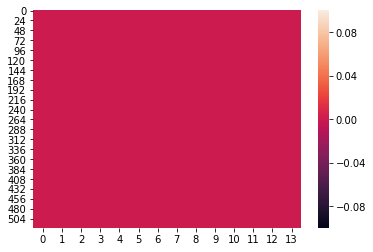

In [19]:
sns.heatmap(cag.isnull().values)

In [20]:
# Removing Nan value and useless rows:
cag = cag.dropna()

In [21]:
#checking if there's any Nan value:
cag.isnull().values.any()

False

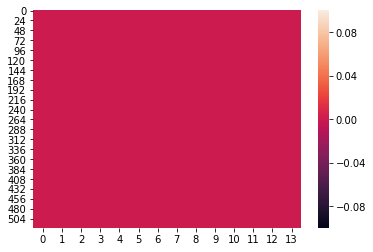

In [22]:
sns.heatmap(cag.isnull().values)

In [23]:
cag.head()

State/UT  Year  Rape  Kidnapping & Abduction  Dowry Deaths  \
0     Andhra Pradesh  2001   871                     765           420   
1  Arunachal Pradesh  2001    33                      55             0   
2              Assam  2001   817                    1070            59   
3              Bihar  2001   888                     518           859   
4       Chhattisgarh  2001   959                     171            70   

   Assault on women with intent to outrage her modesty   \
0                                               3544      
1                                                 78      
2                                                850      
3                                                562      
4                                               1763      

   Insult to modesty of women  Cruelty by Husband or his Relatives  \
0                        2271                                 5791   
1                           3                                   11   
2                           4                                 1248   
3                          21                                 1558   
4                         161                                  840   

   Importation of Girls from foreign country  Immoral Traffic (P) Act  \
0                                          7                     1332   
1                                          0                        0   
2                                          0                        6   
3                                         83                       29   
4                                          0                       12   

   Dowry Prohibition Act  Indecent Representation of Women(P) Act  \
0                    551                                      925   
1                      0                                        0   
2                    179                                       10   
3                    835                                        3   
4                     13                                        0   

   Commission of Sati Prevention Act  Total Crimes Against Women  
0                                  0                       16477  
1                                  0                         180  
2                                  0                        4243  
3                                  0                        5356  
4                                  0                        3989

In [24]:
#Converting Year column to integer datatype:
cag['Year'] = cag['Year'].apply(lambda x:int(x))
cag.columns

Index(['State/UT', 'Year', 'Rape', 'Kidnapping & Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty ',
       'Insult to modesty of women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls from foreign country', 'Immoral Traffic (P) Act',
       'Dowry Prohibition Act', 'Indecent Representation of Women(P) Act',
       'Commission of Sati Prevention Act', 'Total Crimes Against Women'],
      dtype='object')

In [25]:
#Renaming 'STATE' to 'State/UT':
cag=cag.rename(columns = {'STATE':'State/UT'})
cag.columns

Index(['State/UT', 'Year', 'Rape', 'Kidnapping & Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty ',
       'Insult to modesty of women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls from foreign country', 'Immoral Traffic (P) Act',
       'Dowry Prohibition Act', 'Indecent Representation of Women(P) Act',
       'Commission of Sati Prevention Act', 'Total Crimes Against Women'],
      dtype='object')

In [26]:
#Saving the dataFrame as a csv file:
cag.to_csv('Data/Cases Reported under Crimes against Women During 2001-2015',index=False)
#Load csv file:
cag = pd.read_csv('Data/Cases Reported under Crimes against Women During 2001-2015')
# cag.to_excel('Cases Reported under Crimes against Women During 2001-2015.xlsx')

#### 2. Age_groups_Incest_other_rape_victim :

In [27]:
# Dataset(RAW): Age_groups_Incest_other_rape_victim  
ageGrpVict.columns

Index(['STATE/UT', 'YEAR', 'Crime Head', 'No. Of Cases Reported',
       'No. of Victims upto 10 years', 'No. of Victims 10-14 years',
       'No. of Victims 14-18 years', 'No. of Victims 18-30 years',
       'No. of Victims 30-50 years', 'No. of Victims above 50 years',
       'Total Victims'],
      dtype='object')

In [28]:
#checking nan values if any:
ageGrpVict.isna().values.any()

False

In [29]:
ageGrpVict['STATE/UT'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       'Daman & Diu', 'Delhi UT', 'Lakshadweep', 'Puducherry',
       'Total (State)', 'Total (UTs)', 'Total (All-India)'], dtype=object)

In [30]:
#Removing useless categories from State columns:
ageGrpVict = ageGrpVict[ageGrpVict['STATE/UT']!='Total (State)']
ageGrpVict = ageGrpVict[ageGrpVict['STATE/UT']!='Total (UTs)']
ageGrpVict = ageGrpVict[ageGrpVict['STATE/UT']!='Total (All-India)']
ageGrpVict.columns

Index(['STATE/UT', 'YEAR', 'Crime Head', 'No. Of Cases Reported',
       'No. of Victims upto 10 years', 'No. of Victims 10-14 years',
       'No. of Victims 14-18 years', 'No. of Victims 18-30 years',
       'No. of Victims 30-50 years', 'No. of Victims above 50 years',
       'Total Victims'],
      dtype='object')

In [31]:
# let's clean the data a bit
# we don't need the Total Rape Victims subgroup in Crime Head,
ageGrpVict = ageGrpVict[ageGrpVict['Crime Head'] != 'Total']

In [32]:
# let's check if the all the rape cases are reported
ageGrpVict[ageGrpVict['Total Victims'] != ageGrpVict['No. Of Cases Reported']].head()

STATE/UT  YEAR        Crime Head  No. Of Cases Reported  \
188      Goa  2003  Other rape cases                     31   
206      Goa  2009  Other rape cases                     46   
219  Gujarat  2002  Other rape cases                    257   
235  Gujarat  2007  Other rape cases                    313   
250  Gujarat  2012  Other rape cases                    465   

     No. of Victims upto 10 years  No. of Victims 10-14 years  \
188                             6                           9   
206                             1                          11   
219                            14                          12   
235                            17                          30   
250                            23                          35   

     No. of Victims 14-18 years  No. of Victims 18-30 years  \
188                           8                           7   
206                          20                          15   
219                          41                         174   
235                          50                         180   
250                          87                         261   

     No. of Victims 30-50 years  No. of Victims above 50 years  Total Victims  
188                           2                              0             32  
206                           2                              0             49  
219                          17                              0            258  
235                          36                              1            314  
250                          57                              1            464

In [33]:
ageGrpVict.columns

Index(['STATE/UT', 'YEAR', 'Crime Head', 'No. Of Cases Reported',
       'No. of Victims upto 10 years', 'No. of Victims 10-14 years',
       'No. of Victims 14-18 years', 'No. of Victims 18-30 years',
       'No. of Victims 30-50 years', 'No. of Victims above 50 years',
       'Total Victims'],
      dtype='object')

In [34]:
#let's store the number of unreported rape cases in another column
ageGrpVict['Unreported Cases'] = ageGrpVict['Total Victims'] - ageGrpVict['No. Of Cases Reported']

# let's taka a look at the new dataframe with unreported cases:
ageGrpVict[ageGrpVict['Unreported Cases'] > 0].head()

STATE/UT  YEAR        Crime Head  No. Of Cases Reported  \
188      Goa  2003  Other rape cases                     31   
206      Goa  2009  Other rape cases                     46   
219  Gujarat  2002  Other rape cases                    257   
235  Gujarat  2007  Other rape cases                    313   
286  Haryana  2012  Other rape cases                    658   

     No. of Victims upto 10 years  No. of Victims 10-14 years  \
188                             6                           9   
206                             1                          11   
219                            14                          12   
235                            17                          30   
286                            39                          63   

     No. of Victims 14-18 years  No. of Victims 18-30 years  \
188                           8                           7   
206                          20                          15   
219                          41                         174   
235                          50                         180   
286                         171                         309   

     No. of Victims 30-50 years  No. of Victims above 50 years  Total Victims  \
188                           2                              0             32   
206                           2                              0             49   
219                          17                              0            258   
235                          36                              1            314   
286                          72                              6            660   

     Unreported Cases  
188                 1  
206                 3  
219                 1  
235                 1  
286                 2

In [35]:
#Saving the dataFrame as a csv file:
ageGrpVict.to_csv('Data/Age_groups_Incest_other_rape_victim',index=False)
#Load csv file:
ageGrpVict = pd.read_csv('Data/Age_groups_Incest_other_rape_victim')

-----------------------------------------------------------------------------------------------------------------------------
<h1 style='color:red'>Exploratory Data Analysis : </h1> 

Using Statiscal analysis and data visualizations<br>*_CAW_ : crime against women

## A. All Crimes Heads under CAW and States

In [36]:
cag.columns

Index(['State/UT', 'Year', 'Rape', 'Kidnapping & Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty ',
       'Insult to modesty of women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls from foreign country', 'Immoral Traffic (P) Act',
       'Dowry Prohibition Act', 'Indecent Representation of Women(P) Act',
       'Commission of Sati Prevention Act', 'Total Crimes Against Women'],
      dtype='object')

In [37]:
#Crime head dictionary:
#With Sum aggr:
crimeDictS = {'Rape':sum, 'Kidnapping & Abduction':sum,'Dowry Deaths':sum,'Assault on women with intent to outrage her modesty ':sum,'Insult to modesty of women':sum,'Cruelty by Husband or his Relatives':sum,'Importation of Girls from foreign country':sum,'Immoral Traffic (P) Act':sum,'Dowry Prohibition Act':sum,'Indecent Representation of Women(P) Act':sum,'Commission of Sati Prevention Act':sum}
#Without aggr list:
crimeDict = ['Rape', 'Kidnapping & Abduction', 'Dowry Deaths','Assault on women with intent to outrage her modesty ','Insult to modesty of women', 'Cruelty by Husband or his Relatives','Importation of Girls from foreign country', 'Immoral Traffic (P) Act','Dowry Prohibition Act', 'Indecent Representation of Women(P) Act','Commission of Sati Prevention Act']

In [38]:
#Removing 'Year' column and grouping statewise by aggregating the columns values as sum
crimes = cag.groupby(["State/UT"], as_index=False).agg(crimeDictS)
#adding new column with sum of crimes for each state
crimes['Total'] = crimes[crimeDict].sum(axis=1)
crimes.head()

State/UT   Rape  Kidnapping & Abduction  Dowry Deaths  \
0      A & N Islands    204                     127            10   
1     Andhra Pradesh  17102                   17936          7096   
2  Arunachal Pradesh    729                     863             3   
3              Assam  21828                   36076          1850   
4              Bihar  16420                   33701         17257   

   Assault on women with intent to outrage her modesty   \
0                                                357      
1                                              68092      
2                                               1099      
3                                              23421      
4                                               8677      

   Insult to modesty of women  Cruelty by Husband or his Relatives  \
0                          61                                  158   
1                       45682                               146574   
2                          26                                  304   
3                         238                                68875   
4                         443                                38677   

   Importation of Girls from foreign country  Immoral Traffic (P) Act  \
0                                          0                       15   
1                                         17                     7957   
2                                          0                        5   
3                                         11                      389   
4                                        452                      417   

   Dowry Prohibition Act  Indecent Representation of Women(P) Act  \
0                      3                                        0   
1                  13571                                    13295   
2                      0                                        0   
3                    875                                       20   
4                  18462                                       10   

   Commission of Sati Prevention Act   Total  
0                                  0     935  
1                                  0  337322  
2                                  0    3029  
3                                  0  153583  
4                                  0  134516

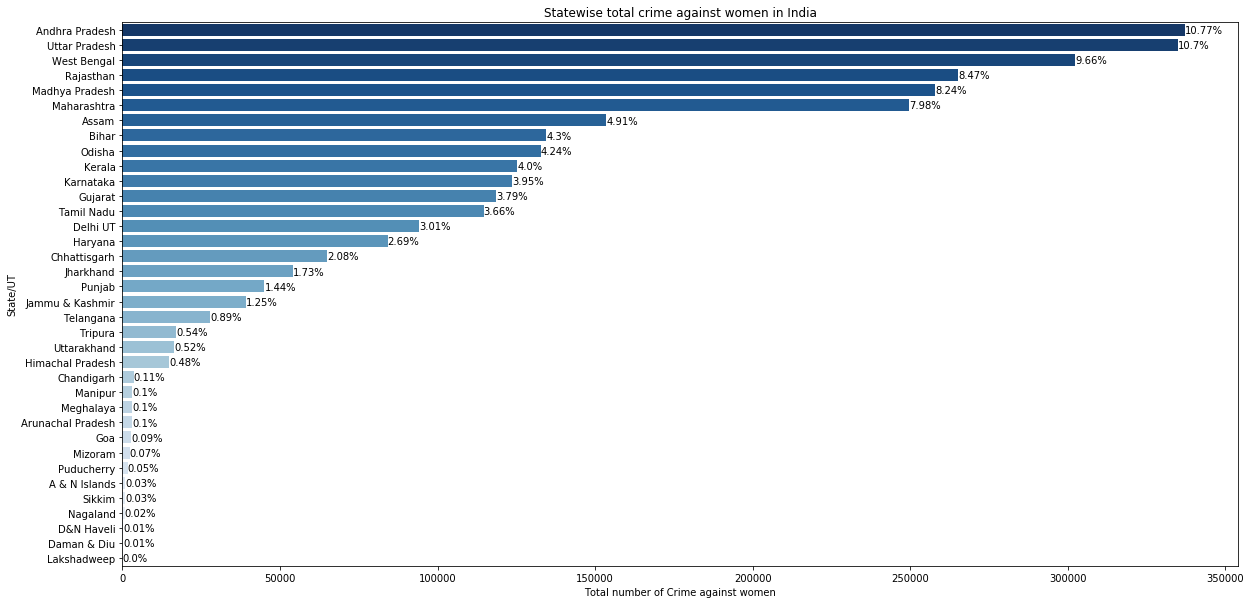

In [39]:
#Lets plot states with total crimes:
plt.figure(figsize=(20,10))
plt.title('Statewise total crime against women in India')
order = crimes.groupby(["State/UT"])['Total'].aggregate(np.median).reset_index().sort_values('Total')
ax=sns.barplot(y='State/UT', x='Total',data=crimes,order=order['State/UT'],palette='Blues')
ax.set(xlabel = 'Total number of Crime against women')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.19,str(round((i.get_width()/total)*100, 2))+'%', fontsize=10,color='black')
# invert for largest on top 
ax.invert_yaxis()
for state in ax.get_yticklabels():state.set_rotation(0)

In [40]:
print('Observations: So as we know the most of the crimes occured in the following top 5 states:')
print('-----------------------------------------------------------------------------------------')
print('[States, Total no. of crimes ]')
x = crimes.sort_values(by='Total', ascending=False).head(5)
x = x[['State/UT','Total']].values
for i in range(0,5):
    print(str(i+1)+'.'+str(x[i]))

Observations: So as we know the most of the crimes occured in the following top 5 states:
-----------------------------------------------------------------------------------------
[States, Total no. of crimes ]
1.['Andhra Pradesh' 337322]
2.['Uttar Pradesh' 334876]
3.['West Bengal' 302383]
4.['Rajasthan' 265141]
5.['Madhya Pradesh' 257998]


In [41]:
print('Observations: Below 5 states for having lesser number of crimes:')
print('---------------------------------------------------------------')
print('[States, Total no. of crimes ]')
x = crimes.sort_values(by='Total').head(5)
x = x[['State/UT','Total']].values
for i in range(0,len(x)):
     print(str(i+1)+'.'+str(x[i]))

Observations: Below 5 states for having lesser number of crimes:
---------------------------------------------------------------
[States, Total no. of crimes ]
1.['Lakshadweep' 37]
2.['Daman & Diu' 196]
3.['D&N Haveli' 322]
4.['Nagaland' 666]
5.['Sikkim' 802]


 We will consider these states for further analysis. <br>
 **Now we want to observe how many of each crimes appeared in all the states years wise**

In [42]:
# adding back "Year" column to our data
crimesYear = cag.groupby(["State/UT","Year"], as_index=False).agg(crimeDictS)
#Making all the crime heads as a single categorical column:
crimesYear_1 = crimesYear.melt(id_vars = ["State/UT", "Year"], value_vars = crimeDict, var_name = 'Crime Head',value_name='no. of crimes')
crimesYear_1.head()

State/UT  Year Crime Head  no. of crimes
0  A & N Islands  2001       Rape              3
1  A & N Islands  2002       Rape              2
2  A & N Islands  2003       Rape              2
3  A & N Islands  2004       Rape             10
4  A & N Islands  2005       Rape              4

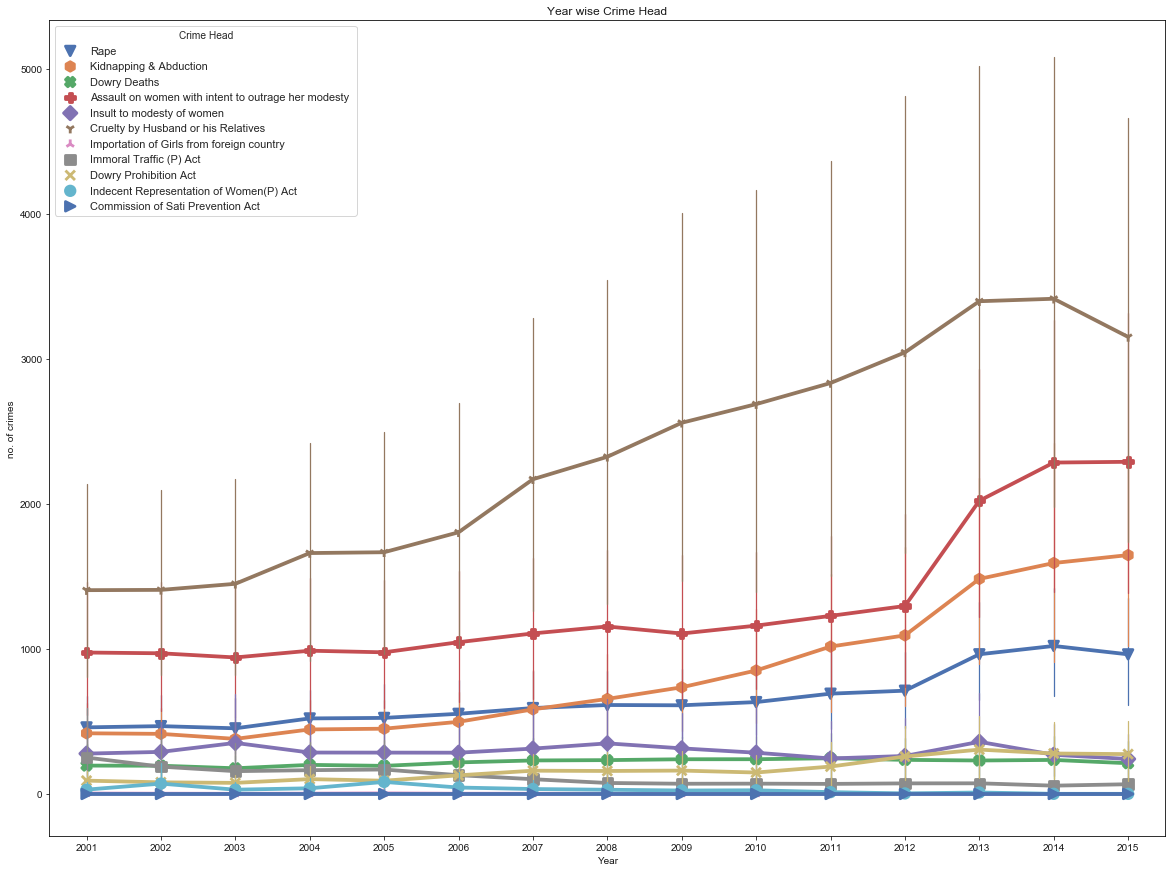

In [43]:
#Number of each crimes dependent on year for each states altogether
plt.figure(figsize=(20,15))
plt.title('Year wise Crime Head')
sns.set(style="ticks",rc={"lines.linewidth": 0.7})
sns.pointplot(data=crimesYear_1, x = 'Year',  y = 'no. of crimes', hue = 'Crime Head',palette='deep',markers=['v','h','X','P','D','1','2','s','x','o','>'],scale = 3)

><b>Observations:</b>
* As we can see, '<b>Cruelty by husband or his relatives</b>' is the most often crime and increases among years till 2013. But starts to dip down from latest available year <b>2015</b>.
* Second to it comes '<b>Assault on women with intent to outrage her modesty </b>' which spikes up in <b>2012</b> and '<b>kidnapping & Abduction </b>' have raising tendency in <b>2012 and 2013</b> it went up against rape cases in 2007. 
* '<b>Rape</b>' cases are following constant pattern similar to 'Assault on women with intent to outrage her modesty' but decreases slightly in <b>2015</b>
* '<b>Importation</b>', '<b>dowry deaths</b>' and '<b>insult to modesty of women</b>' are keeping constant, smaller values. 
* The year 2013 shows rise in crimes and 2014 had high number of crimes.
* So now we know that , <b>2013, 2014</b>  are the unique years. Spikes in the number of crimes is observed in these years.



**Now lets analyse our top 5 states(Andhra Pradesh, Uttar Pradesh, West Bengal, Rajasthan and Madhya Pradesh) with crime heads.**

In [44]:
states = ["Andhra Pradesh","Uttar Pradesh","West Bengal","Rajasthan","Madhya Pradesh"]
select_variable = widgets.Dropdown(
    options=states,
    value=states[0],
    description='Select State:',
    disabled=False,
    button_style=''
)
def get_and_plot(b):
    clear_output()
    display(select_variable)
    #print(select_variable.value)
    state = select_variable.value
    apYear = cag.groupby(["State/UT","Year"], as_index=False).agg(crimeDictS)
     #Making all the crime heads as a single categorical column:
    apYear_1 = apYear.melt(id_vars = ["State/UT", "Year"], value_vars = crimeDict, var_name ='Crime Head',value_name='no. of crimes') 
    plt.figure(figsize=(15,10))
    plt.title('Crimes against women in '+state)
    order = apYear_1.groupby(["Crime Head"])['no. of crimes'].aggregate(np.sum).reset_index().sort_values('no. of crimes')
    ax = sns.barplot(y='Crime Head', x=apYear_1[apYear_1['State/UT']==state]['no. of crimes'],data=apYear_1,order=order['Crime Head'],palette='viridis')
    # create a list to collect the plt.patches data
    totals = []
    # find the values and append to list
    for i in ax.patches:
         totals.append(i.get_width())
    # set individual bar lables using above list
    total = sum(totals)
    # set individual bar lables using above list
    for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+.3, i.get_y()+.33,str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,color='black')
# invert for largest on top 
ax.invert_yaxis()
display(select_variable)
select_variable.observe(get_and_plot, names='value')

Dropdown(description='Select State:', options=('Andhra Pradesh', 'Uttar Pradesh', 'West Bengal', 'Rajasthan', …

>**Observations:** 
1. Andhra Pradesh: Top 4 Crimes are: 
    * Cruelty By Husband or his Relatives
    * Assault on women with intent to outrage her modesty
    * Insult to modesty of women
    * Kidnapping  & Abduction
2. Uttar Pradesh : Top 4 Crimes are:
    * Cruelty By Husband or his Relatives
    * Kidnapping  & Abduction
    * Assault on women with intent to outrage her modesty
    * Dowry Deaths
3. West Bengal   : Top 4 crimes are:
    * Cruelty By Husband or his Relatives
    * Assault on women with intent to outrage her modesty
    * Kidnapping  & Abduction
    * Rape
4. Rajasthan     : Top 4 crimes are:
    * Cruelty By Husband or his Relatives
    * Assault on women with intent to outrage her modesty
    * Kidnapping  & Abduction
    * Rape
5. MadhyaPradesh : Top 4 crimes are:
    * Assault on women with intent to outrage her modesty
    * Cruelty By Husband or his Relatives
    * Rape
    * Kidnapping  & Abduction

**Lets find out which states are increasing the crimes in 2007,2013,2014 :**

In [45]:
slice = cag[(cag['State/UT']=='Andhra Pradesh') | (cag['State/UT']=='Uttar Pradesh')| (cag['State/UT']=='West Bengal')| (cag['State/UT']=='Rajasthan')|(cag['State/UT']=='Madhya Pradesh')]
slice = slice[(slice['Year']==2013)|(slice['Year']==2014)|(slice['Year']==2007)]

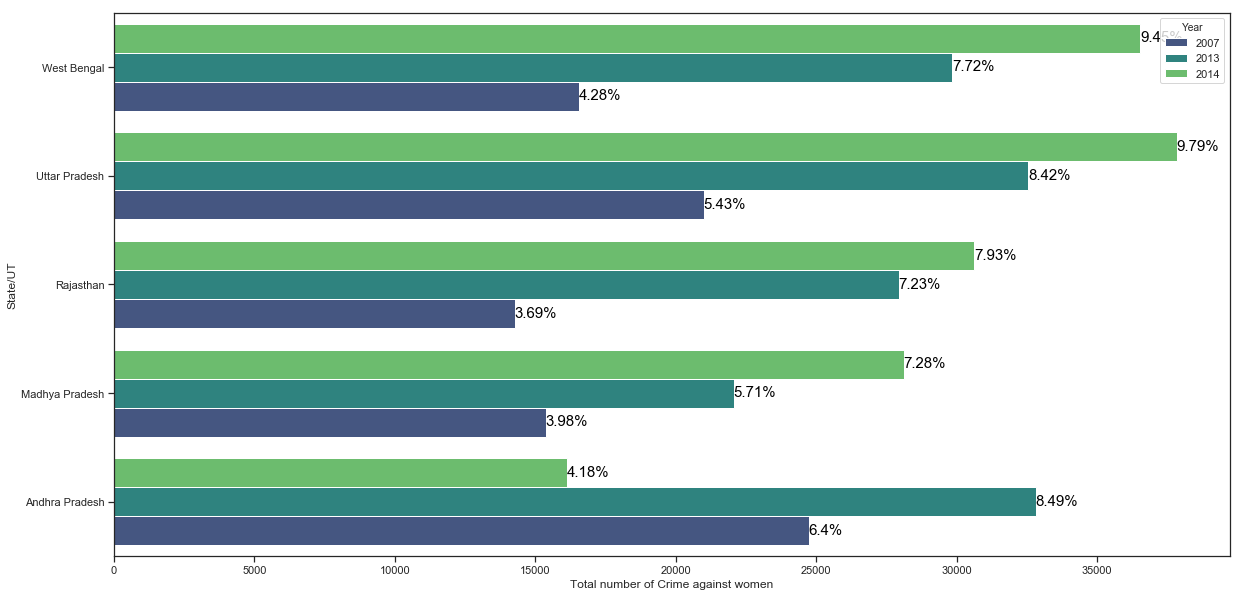

In [46]:
plt.figure(figsize=(20,10))
ax=sns.barplot(y='State/UT', x='Total Crimes Against Women',hue='Year',data=slice,palette='viridis')
ax.set(xlabel = 'Total number of Crime against women')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
# get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.1, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='black')
# invert for largest on top 
ax.invert_yaxis()
for state in ax.get_yticklabels():state.set_rotation(0)

>* **West Bengal** and **Uttar Pradesh** are highly responsible for the spike in number crimes in 2014
* **Andhra Pradesh** and **Uttar Pradesh** are higle reponsible for the spike in number crimes in 2013
* **Andhra Pradesh** and **Uttar Pradesh** are highly responsible for spike of Kidnapping & Abduction cases in 2007.(see also:Top 4 crimes of Andhra Pradesh and Uttar Pradesh)
* But its Andhra Pradesh itself which is showing  fall in crimes in 2014. And we can relate it with formation of Telangana.
  Telangana was founded in 2nd June,2014.




**Lets see which states other than these top 5 are increasing the crimes in 2013 to 2014**

In [47]:
caw = pd.read_excel('Data/caw.xlsx')

In [48]:
sliceCAW = caw[(caw['Year']==2013)|(caw['Year']==2014)]
#Removing 'Year' column and grouping statewise by aggregating the columns values as sum
crimeSlice = sliceCAW.groupby(["State/UT"], as_index=False).agg(crimeDictS)
#adding new column with sum of crimes for each state
crimeSlice['Total'] = crimeSlice[crimeDict].sum(axis=1)

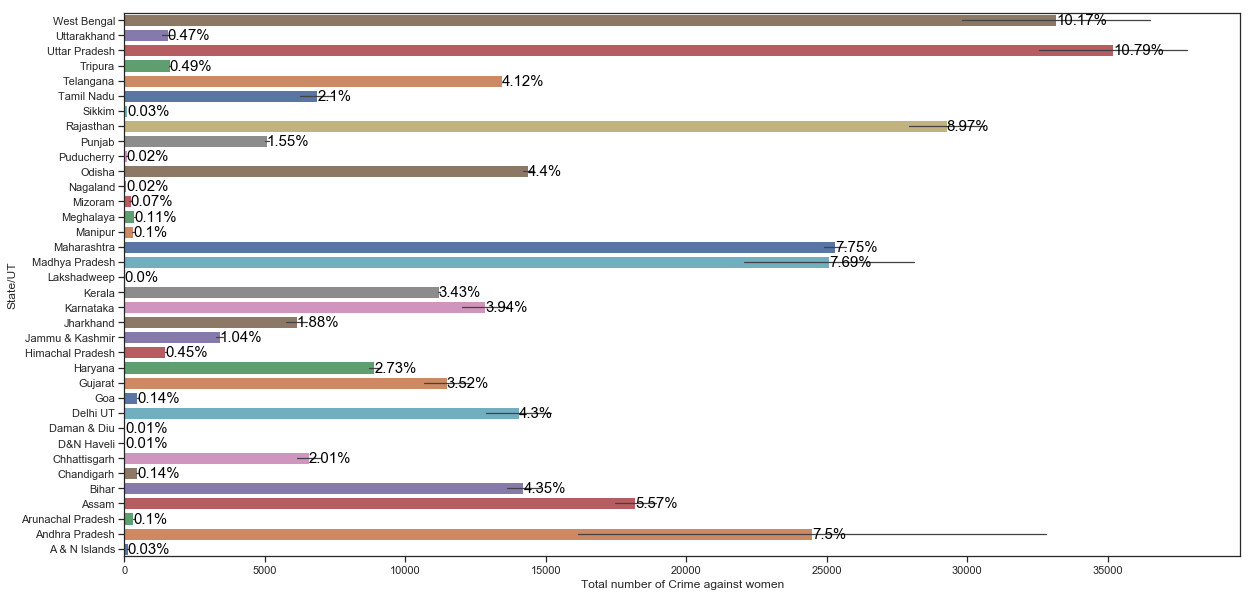

In [49]:
plt.figure(figsize=(20,10))
ax=sns.barplot(y='State/UT', x='Total',data=sliceCAW,palette='deep')
ax.set(xlabel = 'Total number of Crime against women')
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
# get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.1, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='black')
# invert for largest on top 
ax.invert_yaxis()
for state in ax.get_yticklabels():state.set_rotation(0)

>**Observations:**<br>
**Maharastra ,Assam, Bihar** are the states other than our top 5 dangerous states(AP,UP,WB,RJ,MP) which are contributing to the rise in crimes against women between the year **2013-14**.

**Lets inter-correlate the crime heads under crime against women :**

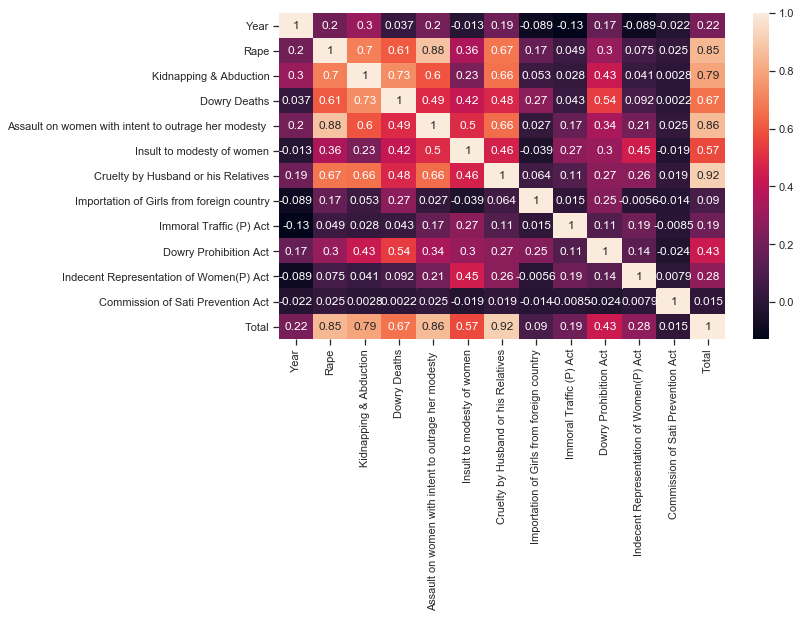

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(caw.corr(),annot=True)

>**Observations:** (_we will consider range beyond -0.5 to 0.5 as it is a best practise_)
* Rape is showing positive relationship with assault to outrage modesty(0.88) kidnapping(0.7), Dowry Deaths(0.61), cruelty by Husband(0.67),Total crimes(0.85). Among these assault to outrage modesty and rape have highly positive correlation. That means there is some relation between rape and assault to outrage modesty crimes. highly positive correlation with total number of crimes says that Rape is contributing much in overal increase in crimes against women.
* kidnapping & Abduction is showing positive relationship with Rape(0.7),Dowry Deaths(0.73), assault to outrage modesty(0.6),cruelty by husband(0.66),Total crimes(0.79)
* Assault on women with intent to outrage her modesty is showing high positive relation with Rape(0.88),Total(0.86) and cruelty by husband(0.66)
* Cruelty By husband is showing Highly positive relation with Total(0.92) as obvious as it is top of the crime against women. Other than this it is showing some links with Rape, Kidnapping, outraging modesty
* Dowry Prohibition cases is showing high relationship with dowry deaths only.

  

---------------------------------------------------------------------------------------------------------------------------------
## B. Victims of Rape
We have two more datasets available related to victims of rape:
**a) Age Group wise victims of rape.**
**b) Offenders relationship with victims of rape.** <br>
The dataset (a) has an interesting column 'No. of reported cases' along with total no. of rapes. From this we can extract what was the no. of Unreported cases.Here Rape categorized into two types as Incest rapes and other rapes.

In [51]:
ageGrpVict.columns

Index(['STATE/UT', 'YEAR', 'Crime Head', 'No. Of Cases Reported',
       'No. of Victims upto 10 years', 'No. of Victims 10-14 years',
       'No. of Victims 14-18 years', 'No. of Victims 18-30 years',
       'No. of Victims 30-50 years', 'No. of Victims above 50 years',
       'Total Victims', 'Unreported Cases'],
      dtype='object')

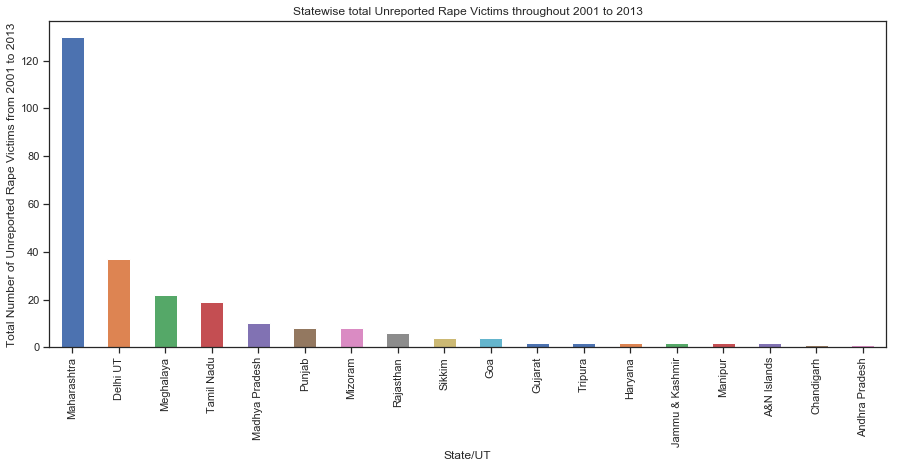

In [52]:
# let's plot the unreported rape cases sorted by states throughout 2001 to 2013
unreported_victims_by_state = ageGrpVict.groupby('STATE/UT').sum()
unreported_victims_by_state.drop('YEAR', axis = 1, inplace = True)
plt.figure(figsize = (15, 6))
ct = unreported_victims_by_state[unreported_victims_by_state['Unreported Cases'] 
                                 > 0]['Unreported Cases'].sort_values(ascending = False)
#print(ct)
ax = ct.plot.bar()
ax.set_xlabel('State/UT')
ax.set_ylabel('Total Number of Unreported Rape Victims from 2001 to 2013')
ax.set_title('Statewise total Unreported Rape Victims throughout 2001 to 2013')
plt.show()

>**Obseravations:** 
    **Maharashtra** seems to have large number unreported cases throughout the year 2001 to 2013.

**Lets plot statewise victims of rape based on Age Group using Heat Map**

In [53]:
rape_victims_by_state = unreported_victims_by_state
rape_victims_by_state.sort_values(by = 'No. Of Cases Reported', ascending = False).head()

No. Of Cases Reported  No. of Victims upto 10 years  \
STATE/UT                                                              
Madhya Pradesh                  40422                           980   
West Bengal                     22472                            91   
Uttar Pradesh                   22108                           949   
Maharashtra                     21049                          1445   
Rajasthan                       19083                           340   

                No. of Victims 10-14 years  No. of Victims 14-18 years  \
STATE/UT                                                                 
Madhya Pradesh                        3631                        9159   
West Bengal                            355                         960   
Uttar Pradesh                         2446                        5048   
Maharashtra                           2004                        6281   
Rajasthan                              881                        3290   

                No. of Victims 18-30 years  No. of Victims 30-50 years  \
STATE/UT                                                                 
Madhya Pradesh                       19119                        7291   
West Bengal                          16604                        4440   
Uttar Pradesh                        10938                        2708   
Maharashtra                           9211                        2134   
Rajasthan                            10656                        3758   

                No. of Victims above 50 years  Total Victims  Unreported Cases  
STATE/UT                                                                        
Madhya Pradesh                            252          40432                10  
West Bengal                                22          22472                 0  
Uttar Pradesh                              19          22108                 0  
Maharashtra                               104          21179               130  
Rajasthan                                 164          19089                 6

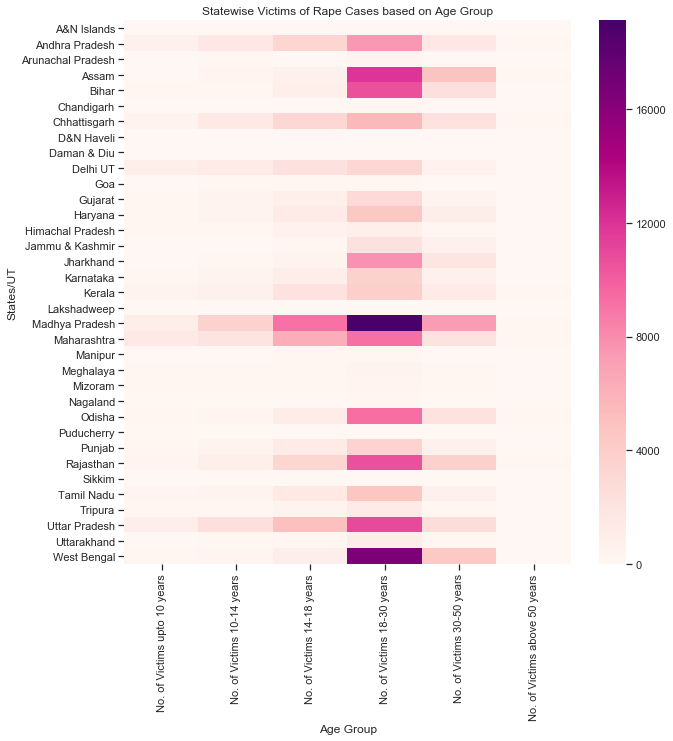

In [54]:
# let's make a heatmap now
rape_victims_heatmap = rape_victims_by_state.drop(['No. Of Cases Reported', 
                                                   'Total Victims', 
                                                   'Unreported Cases'], axis = 1)
plt.subplots(figsize = (10, 10))
ax = sns.heatmap(rape_victims_heatmap, cmap="RdPu")
ax.set_xlabel('Age Group')
ax.set_ylabel('States/UT')
ax.set_title('Statewise Victims of Rape Cases based on Age Group')
plt.show()

>**Observations:** 
* Throughout the year 2001 to 2013, the most suffered age-group are **18-30** followed by **14-18**.
* The age group of **18-30** has badly suffered in the states of **Madhya Pradesh, West Bengal, Assam, Bihar, Uttar Pradesh, Rajasthan Maharashtra and Odisha**. Especially in **Madhya Pradesh and West Bengal** have more than **12000** victims of age group **18-30**.
* It is very dissapointing and shameful. There are three states wherein almost all the age groups(_except above50s_) have suffered relatively alot, they are **Madhya Pradesh, Maharashtra, Uttar Pradesh**. 
* Age groups **10-14** and **30-50** also have relatively more suffering in the state of **Madhya Pradesh**.

**let's first plot only the total number of rape cases reported in each state**

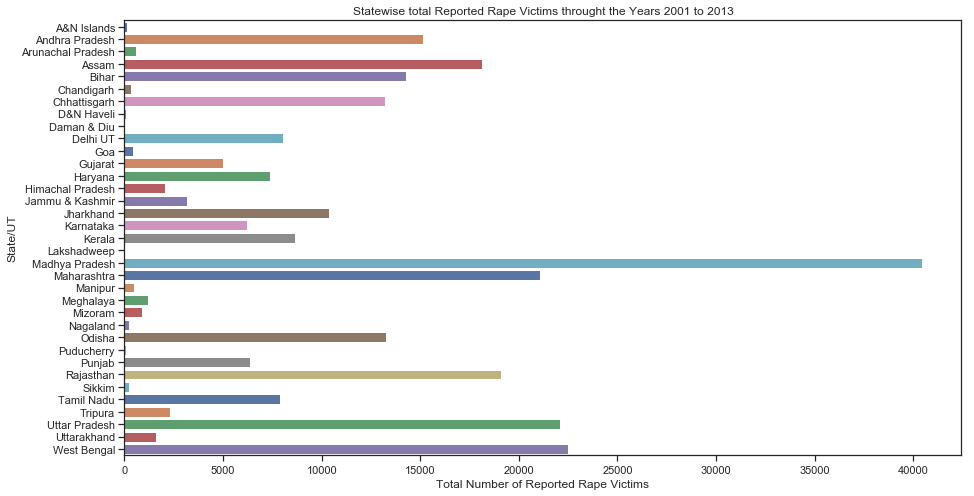

In [55]:
plt.subplots(figsize = (15, 8))
ax = sns.barplot(y = rape_victims_by_state.index, x = rape_victims_by_state['No. Of Cases Reported'],palette='deep')
ax.set_ylabel('State/UT')
ax.set_xlabel('Total Number of Reported Rape Victims')
ax.set_title('Statewise total Reported Rape Victims throught the Years 2001 to 2013')
plt.show()

> **Madhya Pradesh, West Bengal and Maharahstra** have more than **16000** victims.Especially Madhya Pradesh crossing **40000** victims.

In [56]:
casedict = {
    'No. Of Cases Reported':sum,
    'Unreported Cases':sum
}
# adding back "Year" column to our data
rapeYear = ageGrpVict.groupby(["STATE/UT","YEAR"], as_index=False).agg(casedict)
# #Making all the crime heads as a single categorical column:
rapeYear_1 = rapeYear.melt(id_vars = ["STATE/UT", "YEAR"], value_vars = ['No. Of Cases Reported', 'Unreported Cases'],
                           var_name = 'Type',value_name='no. of rape cases')
rapeYear_1.head()

STATE/UT  YEAR                   Type  no. of rape cases
0  A&N Islands  2001  No. Of Cases Reported                  3
1  A&N Islands  2002  No. Of Cases Reported                  2
2  A&N Islands  2003  No. Of Cases Reported                  2
3  A&N Islands  2004  No. Of Cases Reported                 10
4  A&N Islands  2005  No. Of Cases Reported                  4

**Lets plot year wise no. of cases reported/unreported**

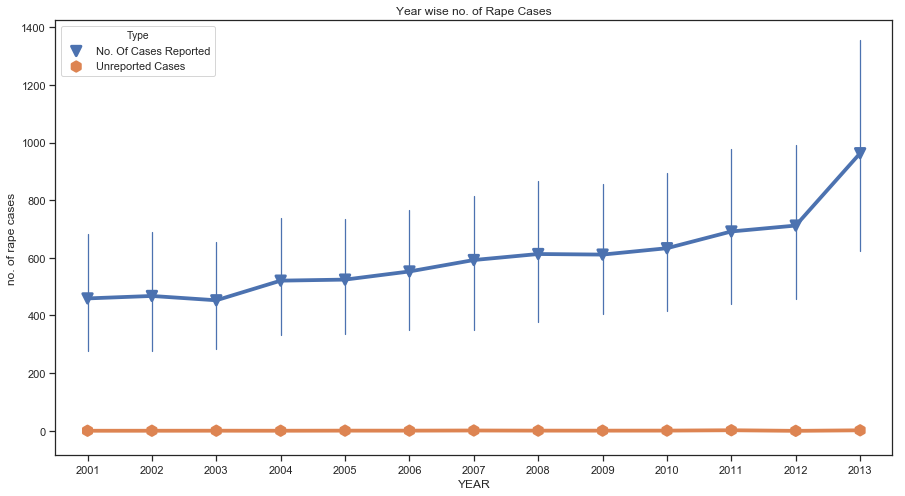

In [57]:
#Number of each crimes dependent on year for each states altogether
plt.figure(figsize=(15,8))
plt.title('Year wise no. of Rape Cases')
sns.set(style="ticks",rc={"lines.linewidth": 0.7})
sns.pointplot(data=rapeYear_1, x = 'YEAR',  y = 'no. of rape cases', hue = 'Type',palette='deep',markers=['v','h','X'],scale = 3)

> Number of reported case spiked up from the year **2012**.

**Lets plot Yearwise number of victims based on Age-groups**

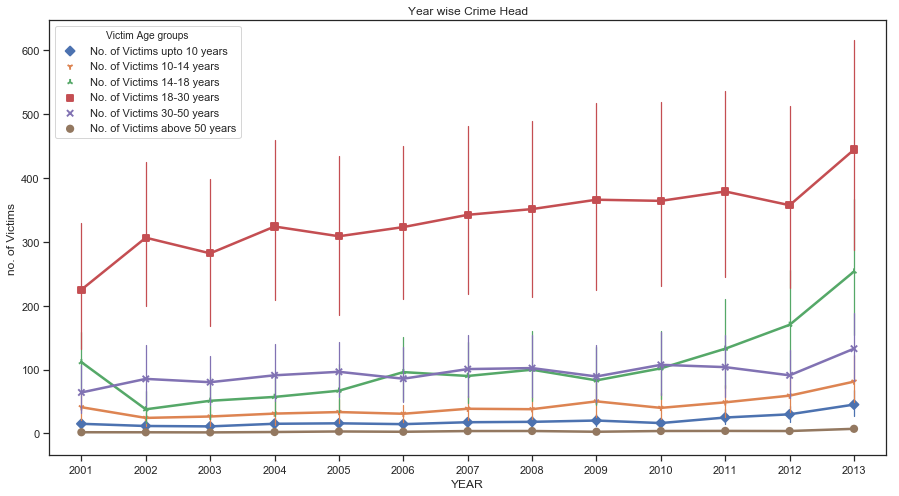

In [58]:
victdictS = {'No. of Victims upto 10 years':sum, 'No. of Victims 10-14 years':sum,'No. of Victims 14-18 years':sum, 'No. of Victims 18-30 years':sum,'No. of Victims 30-50 years':sum, 'No. of Victims above 50 years':sum}
victlist = [ 'No. of Victims upto 10 years', 'No. of Victims 10-14 years','No. of Victims 14-18 years', 'No. of Victims 18-30 years','No. of Victims 30-50 years', 'No. of Victims above 50 years']
# adding back "Year" column to our data
victYear = ageGrpVict.groupby(["STATE/UT","YEAR"], as_index=False).agg(victdictS)
# #Making all the crime heads as a single categorical column:
victYear_1 = victYear.melt(id_vars = ["STATE/UT", "YEAR"], value_vars = victlist,
                           var_name = 'Victim Age groups',value_name='no. of Victims')
victYear_1.head()
#Number of each crimes dependent on year for each states altogether
plt.figure(figsize=(15,8))
plt.title('Year wise Crime Head')
sns.set(style="ticks",rc={"lines.linewidth": 0.7})
sns.pointplot(data=victYear_1, x = 'YEAR',  y = 'no. of Victims', hue = 'Victim Age groups',markers=['D','1','2','s','x','o'],palette='deep',scale = 2)

>**Observations:**
* High rise of victims of age group 14-18 since 2011
* Highest numbers observed in age group 18-30
* For age groups of upto 10 and 10-14, rise is seen from the year 2011 and 2012 respectively

<h1 style='color:red'>Census Factors : </h1> 

Population and sex ratio

In [59]:
#Main dataset:
cag.head()

State/UT  Year  Rape  Kidnapping & Abduction  Dowry Deaths  \
0     Andhra Pradesh  2001   871                     765           420   
1  Arunachal Pradesh  2001    33                      55             0   
2              Assam  2001   817                    1070            59   
3              Bihar  2001   888                     518           859   
4       Chhattisgarh  2001   959                     171            70   

   Assault on women with intent to outrage her modesty   \
0                                               3544      
1                                                 78      
2                                                850      
3                                                562      
4                                               1763      

   Insult to modesty of women  Cruelty by Husband or his Relatives  \
0                        2271                                 5791   
1                           3                                   11   
2                           4                                 1248   
3                          21                                 1558   
4                         161                                  840   

   Importation of Girls from foreign country  Immoral Traffic (P) Act  \
0                                          7                     1332   
1                                          0                        0   
2                                          0                        6   
3                                         83                       29   
4                                          0                       12   

   Dowry Prohibition Act  Indecent Representation of Women(P) Act  \
0                    551                                      925   
1                      0                                        0   
2                    179                                       10   
3                    835                                        3   
4                     13                                        0   

   Commission of Sati Prevention Act  Total Crimes Against Women  
0                                  0                       16477  
1                                  0                         180  
2                                  0                        4243  
3                                  0                        5356  
4                                  0                        3989

In [60]:
pop = pd.read_excel('Data/CensusPopulation2001to2015.xlsx')
pop.head()

State/UT   2001   2002   2003   2004   2005   2006   2007   2008  \
0   Jammu & Kashmir  10291  10291  10291  10291  10291  11035  11035  11035   
1  Himachal Pradesh   6131   6131   6131   6131   6131   6498   6498   6498   
2            Punjab  24625  24625  24625  24625  24625  26257  26257  26257   
3       Chandigarh     921    921    921    921    921   1135   1135   1135   
4       Uttarakhand   8578   8578   8578   8578   8578   9305   9305   9305   

    2009   2010   2011   2012   2013   2014   2015  
0  11035  11035  11806  11806  11806  11806  11806  
1   6498   6498   6831   6831   6831   6831   6831  
2  26257  26257  27861  27861  27861  27861  27861  
3   1135   1135   1480   1480   1480   1480   1480  
4   9305   9305  10027  10027  10027  10027  10027

In [61]:
sr = pd.read_excel('Data/SexRatio2001to2015.xlsx')

In [62]:
cag['SYID']=cag['State/UT']+(cag['Year'].apply(lambda x:str(x)))

In [63]:
cag.head()

State/UT  Year  Rape  Kidnapping & Abduction  Dowry Deaths  \
0     Andhra Pradesh  2001   871                     765           420   
1  Arunachal Pradesh  2001    33                      55             0   
2              Assam  2001   817                    1070            59   
3              Bihar  2001   888                     518           859   
4       Chhattisgarh  2001   959                     171            70   

   Assault on women with intent to outrage her modesty   \
0                                               3544      
1                                                 78      
2                                                850      
3                                                562      
4                                               1763      

   Insult to modesty of women  Cruelty by Husband or his Relatives  \
0                        2271                                 5791   
1                           3                                   11   
2                           4                                 1248   
3                          21                                 1558   
4                         161                                  840   

   Importation of Girls from foreign country  Immoral Traffic (P) Act  \
0                                          7                     1332   
1                                          0                        0   
2                                          0                        6   
3                                         83                       29   
4                                          0                       12   

   Dowry Prohibition Act  Indecent Representation of Women(P) Act  \
0                    551                                      925   
1                      0                                        0   
2                    179                                       10   
3                    835                                        3   
4                     13                                        0   

   Commission of Sati Prevention Act  Total Crimes Against Women  \
0                                  0                       16477   
1                                  0                         180   
2                                  0                        4243   
3                                  0                        5356   
4                                  0                        3989   

                    SYID  
0     Andhra Pradesh2001  
1  Arunachal Pradesh2001  
2              Assam2001  
3              Bihar2001  
4       Chhattisgarh2001

In [64]:
sr['SYID'] = sr['State/UT']+(sr['Year'].apply(lambda x:str(x)))

In [65]:
sr.head()

State/UT  Year   Sex_Ratio                  SYID
0   Jammu & Kashmir  2001  112.054399   Jammu & Kashmir2001
1  Himachal Pradesh  2001  103.349917  Himachal Pradesh2001
2            Punjab  2001  114.242213            Punjab2001
3       Chandigarh   2001  129.104478       Chandigarh 2001
4       Uttarakhand  2001  103.631616       Uttarakhand2001

In [66]:
cag.set_index('SYID').head()

State/UT  Year  Rape  Kidnapping & Abduction  \
SYID                                                                           
Andhra Pradesh2001        Andhra Pradesh  2001   871                     765   
Arunachal Pradesh2001  Arunachal Pradesh  2001    33                      55   
Assam2001                          Assam  2001   817                    1070   
Bihar2001                          Bihar  2001   888                     518   
Chhattisgarh2001            Chhattisgarh  2001   959                     171   

                       Dowry Deaths  \
SYID                                  
Andhra Pradesh2001              420   
Arunachal Pradesh2001             0   
Assam2001                        59   
Bihar2001                       859   
Chhattisgarh2001                 70   

                       Assault on women with intent to outrage her modesty   \
SYID                                                                          
Andhra Pradesh2001                                                  3544      
Arunachal Pradesh2001                                                 78      
Assam2001                                                            850      
Bihar2001                                                            562      
Chhattisgarh2001                                                    1763      

                       Insult to modesty of women  \
SYID                                                
Andhra Pradesh2001                           2271   
Arunachal Pradesh2001                           3   
Assam2001                                       4   
Bihar2001                                      21   
Chhattisgarh2001                              161   

                       Cruelty by Husband or his Relatives  \
SYID                                                         
Andhra Pradesh2001                                    5791   
Arunachal Pradesh2001                                   11   
Assam2001                                             1248   
Bihar2001                                             1558   
Chhattisgarh2001                                       840   

                       Importation of Girls from foreign country  \
SYID                                                               
Andhra Pradesh2001                                             7   
Arunachal Pradesh2001                                          0   
Assam2001                                                      0   
Bihar2001                                                     83   
Chhattisgarh2001                                               0   

                       Immoral Traffic (P) Act  Dowry Prohibition Act  \
SYID                                                                    
Andhra Pradesh2001                        1332                    551   
Arunachal Pradesh2001                        0                      0   
Assam2001                                    6                    179   
Bihar2001                                   29                    835   
Chhattisgarh2001                            12                     13   

                       Indecent Representation of Women(P) Act  \
SYID                                                             
Andhra Pradesh2001                                         925   
Arunachal Pradesh2001                                        0   
Assam2001                                                   10   
Bihar2001                                                    3   
Chhattisgarh2001                                             0   

                       Commission of Sati Prevention Act  \
SYID                                                       
Andhra Pradesh2001                                     0   
Arunachal Pradesh2001                                  0   
Assam2001                                              0   
Bihar2001                                              0   
Chhattisgarh2001        

In [67]:
sr.set_index('SYID').head()

State/UT  Year   Sex_Ratio
SYID                                                    
Jammu & Kashmir2001    Jammu & Kashmir  2001  112.054399
Himachal Pradesh2001  Himachal Pradesh  2001  103.349917
Punjab2001                      Punjab  2001  114.242213
Chandigarh 2001            Chandigarh   2001  129.104478
Uttarakhand2001            Uttarakhand  2001  103.631616

In [68]:
new = pd.merge(cag,sr,how='inner',on='SYID')

In [69]:
new.drop(['State/UT_y', 'Year_y'],axis=1,inplace=True)

In [70]:
new.set_index('SYID',inplace=True)

In [71]:
#Making all the crime heads as a single categorical column:
yearList = [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
pop_1 = pop.melt(id_vars = ["State/UT"], value_vars = yearList, var_name = 'Year',value_name='Population(in K)')
pop_1.head(2)

State/UT  Year  Population(in K)
0   Jammu & Kashmir  2001             10291
1  Himachal Pradesh  2001              6131

In [72]:
pop_1['SYID'] = pop_1['State/UT']+(pop_1['Year'].apply(lambda x:str(x)))

In [73]:
pop_1.set_index('SYID').head(2)

State/UT  Year  Population(in K)
SYID                                                          
Jammu & Kashmir2001    Jammu & Kashmir  2001             10291
Himachal Pradesh2001  Himachal Pradesh  2001              6131

In [74]:
pop_1.drop(['State/UT','Year'],inplace=True,axis=1)


In [75]:
pop_1.set_index('SYID',inplace=True)

In [76]:
new = pd.merge(new,pop_1,how='inner',on='SYID')

In [77]:
newCorr = new.drop([ 'Importation of Girls from foreign country','Immoral Traffic (P) Act', 'Dowry Prohibition Act','Indecent Representation of Women(P) Act','Commission of Sati Prevention Act'],axis=1)

In [78]:
l = newCorr.corr(method='kendall')

In [79]:
l = l.drop(['Year_x', 'Rape', 'Kidnapping & Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty ',
       'Insult to modesty of women', 'Cruelty by Husband or his Relatives',
       'Total Crimes Against Women'],axis=1)
l = l.drop('Year_x')

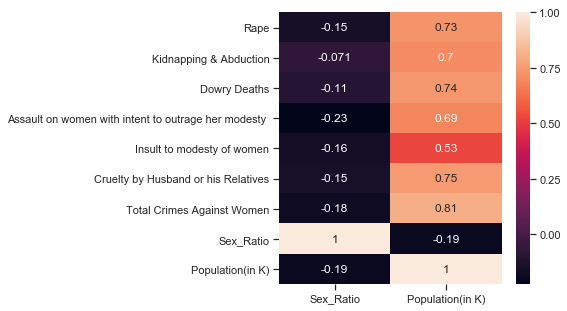

In [80]:
plt.figure(figsize=(5,5))
sns.heatmap(l,annot=True)

> **Observations**:
  * Sex Ratio is showing negative relation with almost all crime heads under Crime Against Women.
  * Population is showing positive relations with crime heads in the above figure.


In [81]:
stateCluster  = crimes

In [82]:
stateCluster.head()

State/UT   Rape  Kidnapping & Abduction  Dowry Deaths  \
0      A & N Islands    204                     127            10   
1     Andhra Pradesh  17102                   17936          7096   
2  Arunachal Pradesh    729                     863             3   
3              Assam  21828                   36076          1850   
4              Bihar  16420                   33701         17257   

   Assault on women with intent to outrage her modesty   \
0                                                357      
1                                              68092      
2                                               1099      
3                                              23421      
4                                               8677      

   Insult to modesty of women  Cruelty by Husband or his Relatives  \
0                          61                                  158   
1                       45682                               146574   
2                          26                                  304   
3                         238                                68875   
4                         443                                38677   

   Importation of Girls from foreign country  Immoral Traffic (P) Act  \
0                                          0                       15   
1                                         17                     7957   
2                                          0                        5   
3                                         11                      389   
4                                        452                      417   

   Dowry Prohibition Act  Indecent Representation of Women(P) Act  \
0                      3                                        0   
1                  13571                                    13295   
2                      0                                        0   
3                    875                                       20   
4                  18462                                       10   

   Commission of Sati Prevention Act   Total  
0                                  0     935  
1                                  0  337322  
2                                  0    3029  
3                                  0  153583  
4                                  0  134516

In [83]:
stateCluster.columns

Index(['State/UT', 'Rape', 'Kidnapping & Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty ',
       'Insult to modesty of women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls from foreign country', 'Immoral Traffic (P) Act',
       'Dowry Prohibition Act', 'Indecent Representation of Women(P) Act',
       'Commission of Sati Prevention Act', 'Total'],
      dtype='object')

In [84]:
fp = stateCluster.drop(['Total'],axis=1)

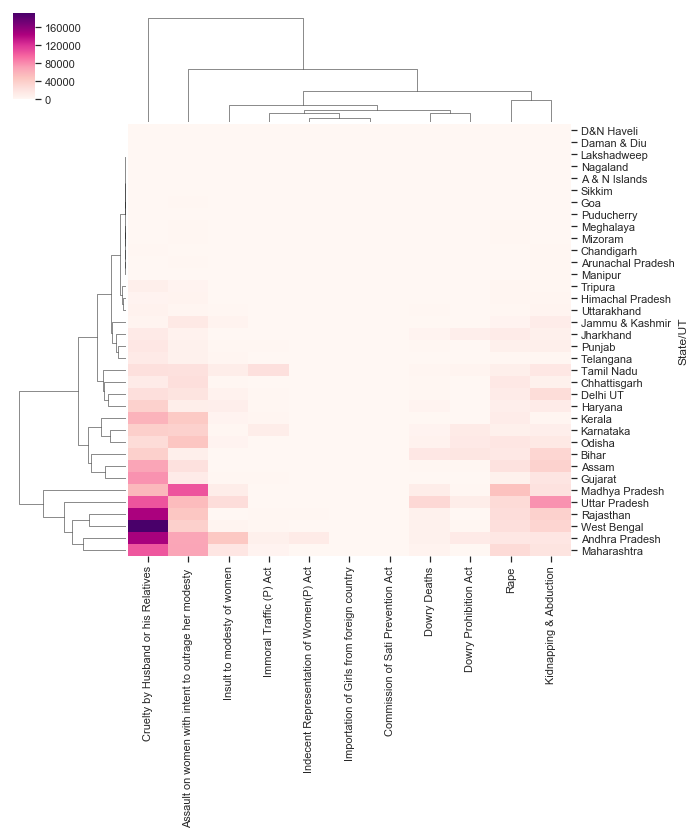

In [85]:
sns.clustermap(fp.set_index('State/UT'),cmap='RdPu')

<h1 style='color:red'>Trend Analysis for next year : </h1> 


In [87]:
df = pd.read_csv('Data/crimeAgainstWomeninIndia.csv')

In [88]:
df.columns

Index(['Symbol', 'State/UT', 'Year', 'Rape', 'Kidnapping & Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty ',
       'Insult to modesty of women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls from foreign country', 'Immoral Traffic (P) Act',
       'Dowry Prohibition Act', 'Indecent Representation of Women(P) Act',
       'Commission of Sati Prevention Act', 'Total Crimes Against Women'],
      dtype='object')

In [89]:
y1 = df['Year'].max()
y2 = y1-1
y3 = y2-1
y4 = y3-1
def pattern(a,b,c):
    if(a == 1):
            if(b == 1):
                if(c==1):return "Higher chances of an increase"
                else:return "Medium chances of an decrease"
            elif(b == 0):
                if(c == 1):return "Medium chances of an increase"      
                else:return "Lower chances of an increase"
    elif(a == 0):
            if(b == 0):
                if(c == 0):return "Lower chances of increase"
                else:return "Medium chances of increase"
            elif(b==1):
                if(c == 0):return "Medium chances of decrease"
                else:return "Higher chances of increase"
x = input('Enter the State/Ut:')
y = input('Enter the crime name:')
x1 = list(df[(df['State/UT']==x) & (df['Year']==y1)][y])
x2 = list(df[(df['State/UT']==x) & (df['Year']==y2)][y])
x3 = list(df[(df['State/UT']==x) & (df['Year']==y3)][y])
x4 = list(df[(df['State/UT']==x) & (df['Year']==y4)][y])
if((x=='Telangana') & (y1 == 2015)):
    s1=0
    s2=0
    if((x1[0] - x2[0]) > 0):
         s3 = 1
    else:
         s3 = 0
else:
    if((x3[0] - x4[0]) > 0):
        s1 = 1
    else:
        s1 = 0
    if((x2[0] - x3[0]) > 0):
         s2 = 1
    else:
         s2 = 0
    if((x1[0] - x2[0]) > 0):
         s3 = 1
    else:
         s3 = 0
    
res = pattern(s1,s2,s3)
print(x+' has '+res+' in '+y+' in the year '+str(y1+1)+' ,considering constant current policies.')


Enter the State/Ut:Madhya Pradesh
Enter the crime name:Rape
Madhya Pradesh has Medium chances of an decrease in Rape in the year 2016 ,considering constant current policies.


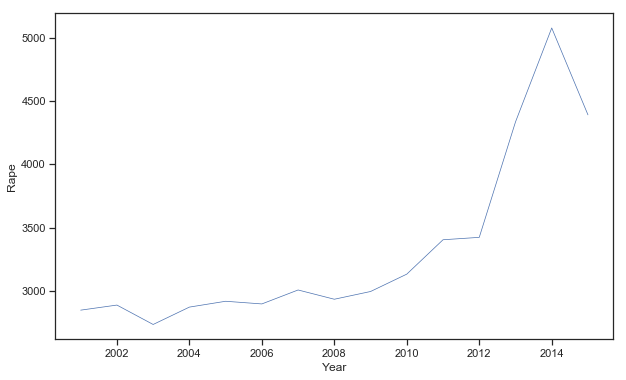

In [90]:
a = df[df['State/UT']==x]
plt.figure(figsize=(10,6))
sns.lineplot(x=a['Year'],y=a[y],data=a)

In [ ]:
-+